# Activity 2.1 : Convolutional Neural Network


#### Objective(s):

This activity aims to introduce how to build a convolutional neural network


#### Intended Learning Outcomes (ILOs):

- Demonstrate how to build and train convolutional neural network
- Evaluate the accuracy and loss of the model using convolutional neural network


#### Resources:

- Jupyter Notebook
- CIFAR-10 dataset


#### Procedures

Load the necessary libraries


In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

- Shuffle the data
- Split the data into train and test sets


In [2]:
def plot_loss_acc(values,model_name='Model'):
    labels = ['loss','accuracy']
    colors = ['#1f77b4', '#2ca02c']
    plt.figure(figsize=(5,1.2))
    plt.table(cellText=[[labels[0],"{:.4f}".format(values[0])], [labels[1], "{:.2%}".format(values[1])]],
            colWidths=[0.8, 0.8],
            cellLoc='center',
            loc='center',
            cellColours=[['lightgrey', colors[0]], ['lightgrey', colors[1]]])
    plt.title(model_name+' Loss and Accuracy',y=0.7)
    plt.axis('off')
    plt.tight_layout() 

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
import pandas as pd
"""
def get_label(label):
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return classes[label]
"""
def to_csv(x,y,name):
    x = x.reshape(x.shape[0],-1)
    temp_df = pd.DataFrame(x)
    temp_df['label'] = [label[0] for label in y]
    temp_df.to_csv(f'{name}.csv', index=False)
    print(name,'saved successfully')

#to_csv(x_train, y_train, 'train')
#to_csv(x_test, y_test, 'test')

test saved successfully


Check the image size


In [ ]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images


[9]


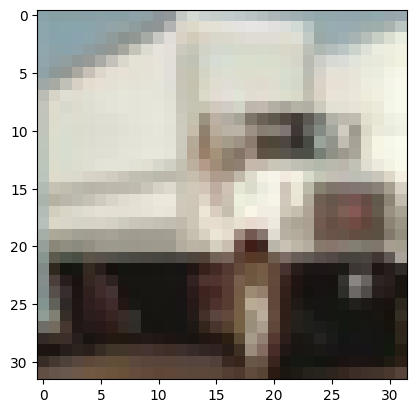

In [ ]:
print(y_train[444])
plt.imshow(x_train[444]);

In [4]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position


In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential


In [6]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                      

- Use batch size of 32
- Initiate RMSprop optimizer
- Train the model using RMSprop


In [7]:
from time import time
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
start = time()
model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))
model1_time = time() - start

Epoch 1/15



1563/1563 [==============================] - 25s 14ms/step - loss: 1.7082 - accuracy: 0.3756 - val_loss: 1.6184 - val_accuracy: 0.4300
Epoch 2/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4326 - accuracy: 0.4846 - val_loss: 1.2890 - val_accuracy: 0.5437
Epoch 3/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.3616 - accuracy: 0.5158 - val_loss: 1.4001 - val_accuracy: 0.4960
Epoch 4/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3239 - accuracy: 0.5325 - val_loss: 1.2037 - val_accuracy: 0.5716
Epoch 5/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2903 - accuracy: 0.5492 - val_loss: 1.2204 - val_accuracy: 0.5731
Epoch 6/15
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2700 - accuracy: 0.5588 - val_loss: 1.1886 - val_accuracy: 0.5963
Epoch 7/15
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2530 - accuracy: 0.5647 - val_loss: 1.2519 - val_accura

1563/1563 [==============================] - 9s 6ms/step - loss: 1.1613 - accuracy: 0.6035


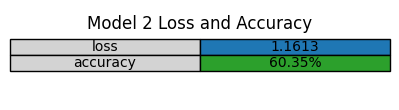

In [8]:
model1_train_eval = model_1.evaluate(x_train,y_train)
plot_loss_acc(model1_train_eval,)

In [ ]:
model1_train_eval = model_1.evaluate(x_train,y_train)
plot_loss_acc(model1_train_eval)

The model took a little more than five minutes to train in fifteen epochs. With a learning rate of 0.005, the model got a loss of 

#### Supplementary Activity


- Build a more complicated model with the following pattern:
  Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

- Write the number of parameters of your model and compare it to the previous model

- Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

- Use different structures and run times, and see how accurate your model can be.


In [5]:
model_2 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#Conv
model_2.add(Conv2D(32, (5, 5), strides = (1,1)))
model_2.add(Activation('relu'))

#MaxPool
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
#Flatten
model_2.add(Flatten())
#Dense
model_2.add(Dense(512))

#Final Classification
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                      

![Alt text](Model1andModel2..png)


The second model have 232, 426 total paramters all of which are trainable. This model's first and second convolution layers are identical to the first one with 2, 432 and 25, 632 parameters. They also have identical number of paramters in dense and in the final classification dense with the first model at 147, 968 and 5130 parameters. The difference is that the second model have two more convolutional layer adding two 25, 632 paramters. Thus, the second model is up by 50, 000 parameters.


In [9]:
batch_size = 32
epoch = 5
opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 129s 82ms/step - loss: 0.9437 - accuracy: 0.6701 - val_loss: 0.9153 - val_accuracy: 0.6817
Epoch 2/5
1563/1563 [==============================] - 131s 84ms/step - loss: 0.9060 - accuracy: 0.6832 - val_loss: 0.8447 - val_accuracy: 0.7079
Epoch 3/5
1563/1563 [==============================] - 129s 83ms/step - loss: 0.8706 - accuracy: 0.6984 - val_loss: 0.8541 - val_accuracy: 0.7096
Epoch 4/5
1563/1563 [==============================] - 137s 88ms/step - loss: 0.8508 - accuracy: 0.7060 - val_loss: 0.8500 - val_accuracy: 0.7076
Epoch 5/5
1563/1563 [==============================] - 132s 85ms/step - loss: 0.8252 - accuracy: 0.7130 - val_loss: 0.8702 - val_accuracy: 0.7021


1563/1563 [==============================] - 40s 25ms/step - loss: 0.7257 - accuracy: 0.7459


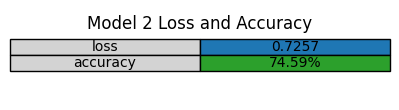

In [36]:
model2_train_eval = model_2.evaluate(x_train,y_train)
plot_loss_acc(model2_train_eval)

313/313 [==============================] - 6s 19ms/step - loss: 0.8702 - accuracy: 0.7021


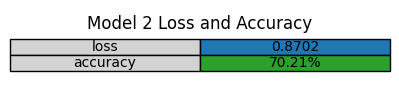

In [37]:
model2_test_eval = model_2.evaluate(x_test,y_test)
plot_loss_acc(model2_test_eval)

Trying to increase the accuracy


In [ ]:
batch_size = 64
epoch = 20
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(x_train, y_train))

#### Conclusion


#type your answer here
